### COVID-19 Data Analysis: Exploring Trends, Vaccination Impact and Insights Through Visualizations. 

### 1. Data Preparation and Cleaning 

In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load the dataset 
df = pd.read_csv('Dataset (1).csv')
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


In [3]:
# reshape the columns 
df.columns = df.columns.str.lower().str.removeprefix(" ").str.removesuffix(" ")
df.head()

,date,country,new cases,new_deaths,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


### Step 2: Data Cleaning 

In [4]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# clean vaccinated columns
df['vaccinated'] = df['vaccinated'].str.replace(',', '') 

# clean country names
df['country'] = df['country'].str.strip().str.title()

# drop rows with invalid dates
df = df.dropna(subset=['date']) 

In [5]:
# Handle missing values
df.isna().sum()
#for col in ['new cases', 'new_deaths']:


date           0
country        0
new cases     10
new_deaths    24
vaccinated     0
dtype: int64

In [6]:
for col in ['new cases', 'new_deaths']:
    
    df[col] = df[col].fillna(0)
    
df['vaccinated'] =  df.groupby('country')['vaccinated'].ffill()

In [7]:
df.isna().sum()

date          0
country       0
new cases     0
new_deaths    0
vaccinated    0
dtype: int64

In [8]:
# remove duplicate values 
df = df.groupby(['date', 'country']).agg({
    'new cases': 'sum',
    'new_deaths': 'sum',
    'vaccinated': 'max'
    }
).reset_index()

In [9]:
# remove negative values 
df['new cases'] = df['new cases'].apply(lambda x: max(x, 0))
df['new_deaths'] = df['new_deaths'].apply(lambda x: max(x, 0))

In [10]:
df.head()

,date,country,new cases,new_deaths,vaccinated
0,2024-11-01,Argentina,0.0,0.0,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Brazil,971.0,48.0,430
3,2024-11-01,Canada,176.0,8.0,unknown
4,2024-11-01,China,1034.0,51.0,462


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        137 non-null    datetime64[ns]
 1   country     137 non-null    object        
 2   new cases   137 non-null    float64       
 3   new_deaths  137 non-null    float64       
 4   vaccinated  137 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 5.5+ KB


### Step 3: Exploratory Data Analysis 

In [60]:
# Global trends over time
global_daily = df.groupby('date').agg({
    'new cases': 'sum',
    'new_deaths': 'sum',
    'vaccinated': 'max'
}).reset_index()

# check for  cumulative totals
global_daily['Cumulative Cases'] = global_daily['new cases'].cumsum()
global_daily['Cumulative Deaths'] = global_daily['new_deaths'].cumsum()

In [61]:
# Country level Analysis 
country_totals = df.groupby('country').agg({
    'new cases': 'sum',
    'new_deaths': 'sum',
    'vaccinated': 'max'
}).reset_index()

# check for fatality rate (deaths per 100 cases)
country_totals['Fatality Rate (%)'] = (country_totals['new_deaths']/country_totals['new cases']) * 100

In [18]:
global_daily

,date,new cases,new_deaths,vaccinated,Cumulative Cases,Cumulative Deaths
0,2024-11-01,2181.0,107.0,unknown,2181.0,107.0
1,2024-11-02,1199.0,58.0,61,3380.0,165.0
2,2024-11-03,1798.0,56.0,474,5178.0,221.0
3,2024-11-04,3262.0,160.0,unknown,8440.0,381.0
4,2024-11-05,1833.0,76.0,450,10273.0,457.0
5,2024-11-06,1373.0,59.0,421,11646.0,516.0
6,2024-11-07,1419.0,70.0,75,13065.0,586.0
7,2024-11-08,2351.0,105.0,unknown,15416.0,691.0
8,2024-11-09,2735.0,134.0,57,18151.0,825.0
9,2024-11-10,1125.0,54.0,unknown,19276.0,879.0


In [24]:
country_totals

,country,new cases,new_deaths,vaccinated,Fatality Rate (%)
0,Argentina,21796.0,942.0,451.0,4.321894
1,Australia,18151.0,776.0,499.0,4.275247
2,Brazil,13286.0,606.0,498.0,4.561192
3,Canada,11510.0,489.0,499.0,4.248480
4,China,12786.0,623.0,493.0,4.872517


In [20]:
print(df['vaccinated'].unique())

['unknown' '327' '430' '462' '195' '336' '173' '369' '61' '425' '474' '47'
 '320' '383' '440' '137' '493' '41' '450' '346' '359' '418' '401' '2'
 '421' '75' '339' '121' '115' '486' '313' '484' '276' '174' '358' '57'
 '476' '252' '142' '18' '171' '454' '285' '471' '70' '433' '182' '404'
 '448' '451' '436' '102' '344' '107' '11' '328' '481' '382' '301' '295'
 '314' '45' '397' '37' '206' '458' '457' '385' '138' '260' '480' '168'
 '352' '169' '120' '332' '499' '187' '465' '349' '309' '278' '422' '131'
 '427' '30' '33' '356' '498' '319' '375' '353' '377' '266' '175' '496'
 '444' '233' '17' '347' '134' '483' '190' '220' '491' '62' '490' '428'
 '438']


In [22]:
# replace the unknown and convert to numeric 
df['vaccinated'] =(
    df['vaccinated'].replace(['unknown','NAN'], np.nan).astype(str).str.replace(',', '')
    .pipe(pd.to_numeric, errors='coerce')
) 

In [23]:
# Country level Analysis 
country_totals = df.groupby('country').agg({
    'new cases': 'sum',
    'new_deaths': 'sum',
    'vaccinated': 'max'
}).reset_index()

# check for fatality rate (deaths per 100 cases)
country_totals['Fatality Rate (%)'] = (country_totals['new_deaths']/country_totals['new cases']) * 100

#### Step 4: Visualization 

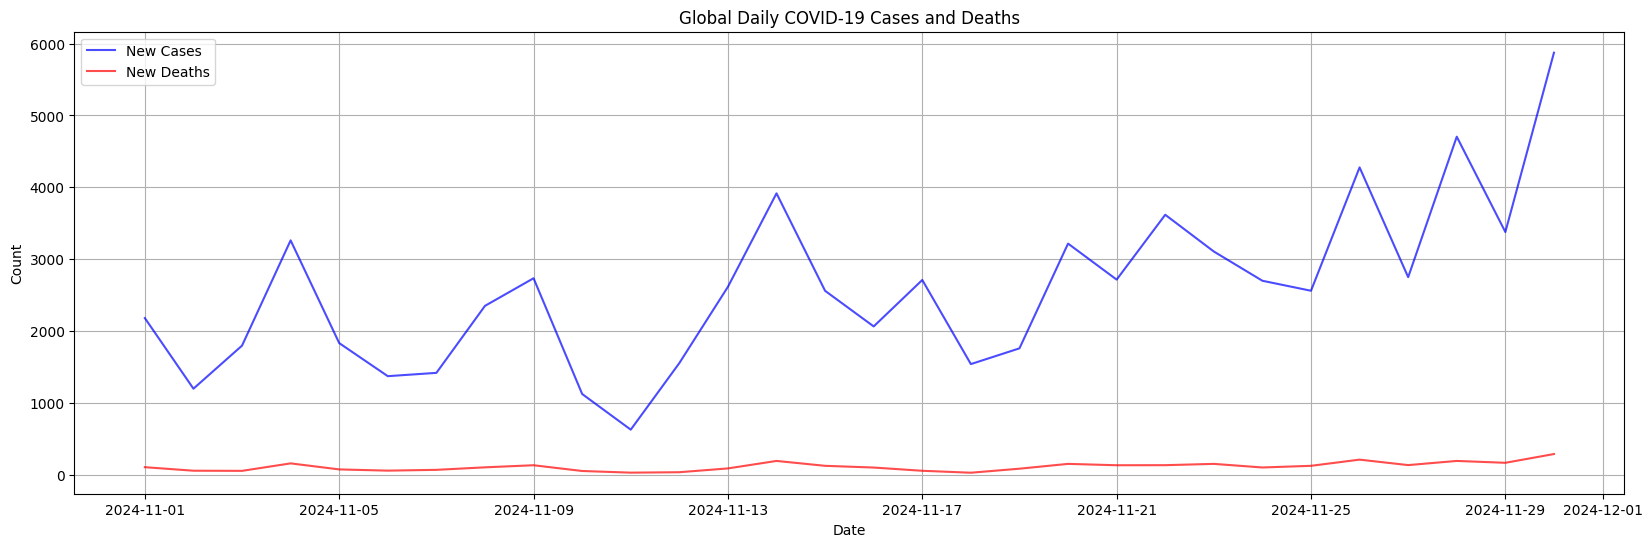

In [14]:
# 1. Global Daily Cases and Deaths
plt.figure(figsize=(20, 6))
plt.plot(global_daily['date'], global_daily['new cases'], label = 'New Cases', color = 'blue', alpha=0.7)
plt.plot(global_daily['date'], global_daily['new_deaths'], label = 'New Deaths', color = 'red', alpha=0.7)
plt.title('Global Daily COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

#### It is show from the graph:
   1. The new cases achieved High peak value during December 2024 and Low Peak Value during November
   2. As a result of this, high mortality rates is recorded on December than other months.

C:\Users\USER\AppData\Local\Temp\ipykernel_15276\2541449971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new cases', y='country', data=top_countries, palette='viridis')


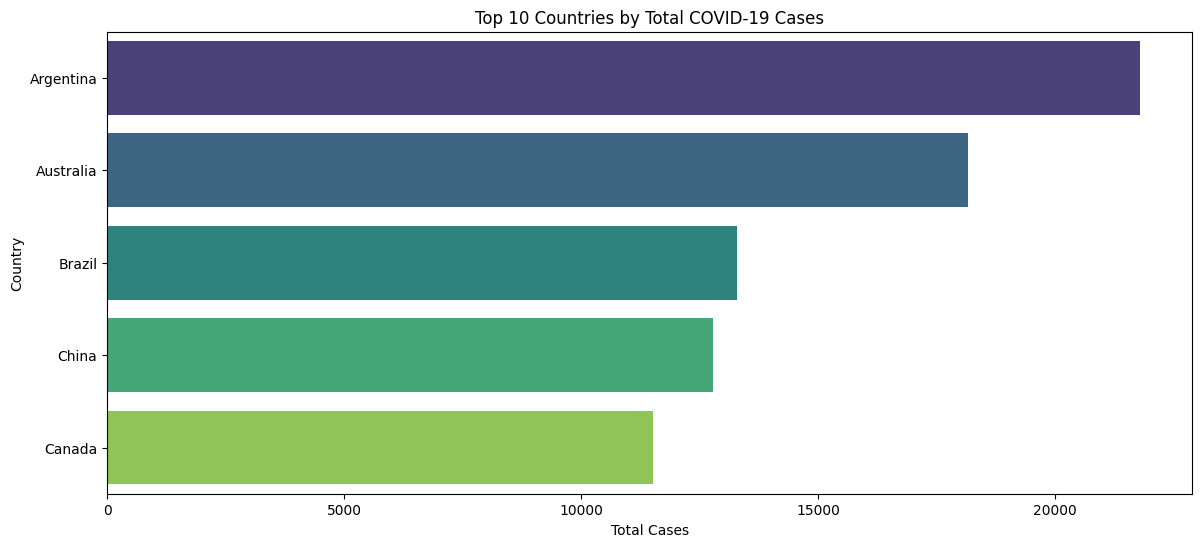

In [15]:
# 2. Top 10 countries by total cases 
top_countries = country_totals.sort_values('new cases', ascending = False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x='new cases', y='country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

### Here, 
   1. Argentina has the highest Covid-19 Cases and Canada has the least of tenth most recorded cases of covid-19

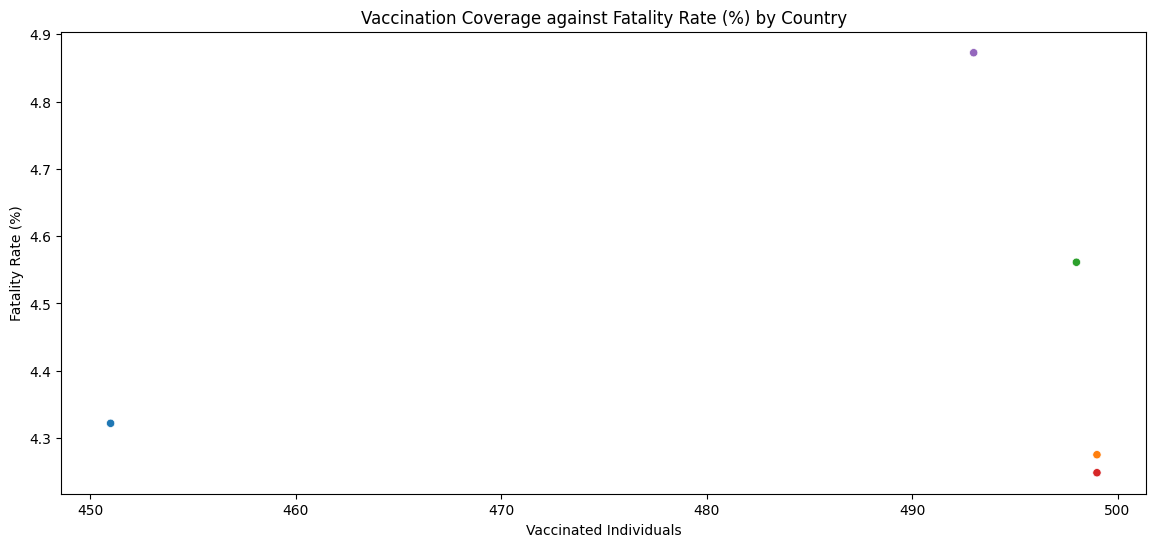

In [25]:
# 3. Vaccination against Fatality Rate
plt.figure(figsize=(14, 6))
sns.scatterplot(x='vaccinated', y='Fatality Rate (%)', data = country_totals, hue='country', legend=False)
plt.title('Vaccination Coverage against Fatality Rate (%) by Country')
plt.xlabel('Vaccinated Individuals')
plt.ylabel('Fatality Rate (%)')
plt.show() 

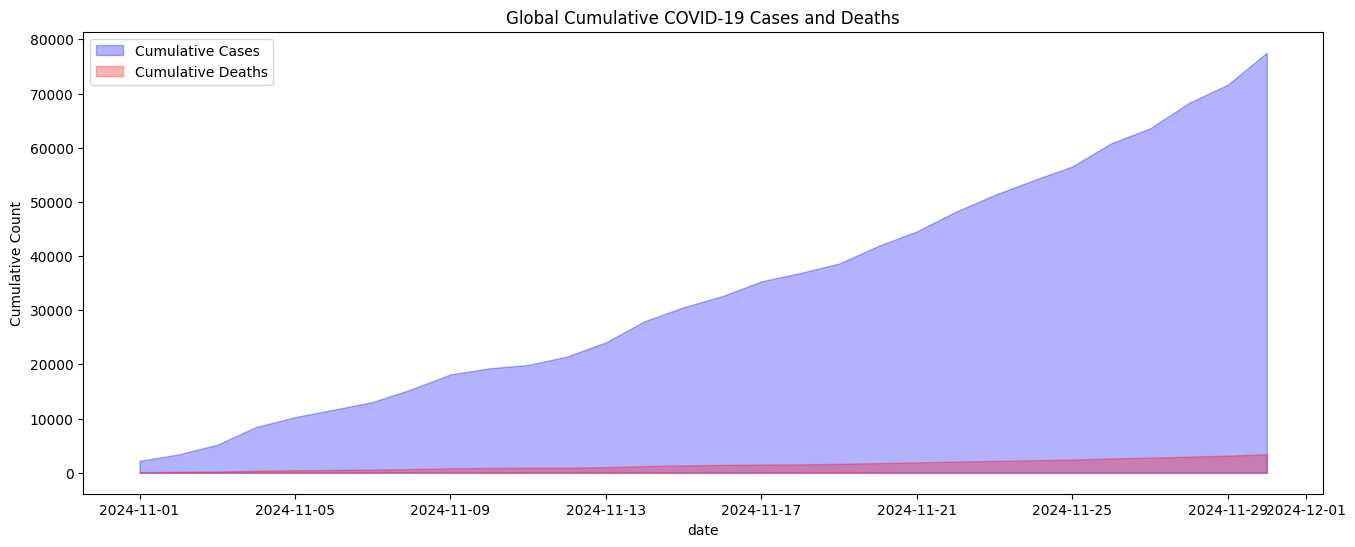

In [62]:
# Cumulative Cases and Deaths Over Time
plt.figure(figsize=(16,6))
plt.fill_between(global_daily['date'], global_daily['Cumulative Cases'], label='Cumulative Cases',  color='blue', alpha=0.3)
plt.fill_between(global_daily['date'], global_daily['Cumulative Deaths'], label='Cumulative Deaths',  color='red', alpha=0.3)
plt.title('Global Cumulative COVID-19 Cases and Deaths') 
plt.xlabel('date') 
plt.ylabel('Cumulative Count') 
plt.legend()
plt.show()

#### Step 5: Key Insights


In [38]:
# Global trends over time
global_daily = df.groupby('date').agg({
    'new cases': 'sum',
    'new_deaths': 'sum'
}).reset_index() 

In [57]:
peak_cases_date = global_daily['new cases'].idxmax()
peak_deaths_date = global_daily['new_deaths'].idxmax()

print(f"Peak daily cases occurred on: {peak_cases_date}") 
print(f"peak daily deaths occurred on: {peak_deaths_date}")

Peak daily cases occurred on: 29
peak daily deaths occurred on: 29


In [33]:
# 2. Vaccination Impact:
vaccine_start_date = df['date'].min()
post_vaccine = global_daily[global_daily['date'] > vaccine_start_date]
pre_vaccine = global_daily[global_daily['date'] <= vaccine_start_date]

print(f"Average daily cases pre-vaccine: {pre_vaccine['new cases'].mean():.0f}")
print(f"Average daily cases post-vaccine: {post_vaccine['new cases'].mean():.0f}") 

Average daily cases pre-vaccine: 2181
Average daily cases post-vaccine: 2598


In [36]:
# 3. Country Comparison:
high_fatality = country_totals.nlargest(5, 'Fatality Rate (%)')
low_fatality = country_totals.nsmallest(5, 'Fatality Rate (%)')
print("Countries with highest fatality rates:\n", high_fatality[['country', 'Fatality Rate (%)']]) 
print("\nCountries with lowest fatality rates:\n", low_fatality[['country', 'Fatality Rate (%)']]) 

Countries with highest fatality rates:
      country  Fatality Rate (%)
4      China           4.872517
2     Brazil           4.561192
0  Argentina           4.321894
1  Australia           4.275247
3     Canada           4.248480

Countries with lowest fatality rates:
      country  Fatality Rate (%)
3     Canada           4.248480
1  Australia           4.275247
0  Argentina           4.321894
2     Brazil           4.561192
4      China           4.872517
